# Deep learning: end-to-end by using TensorFlow Keras, Hyperopt and MLflow

###[Banafsheh Hassani](https://www.linkedin.com/in/banafsheh-hassani-7b063a129/)

###[More Projects](https://github.com/BanafshehHassani)

[Reference](https://scikit-learn.org/0.19/auto_examples/text/document_classification_20newsgroups.html)

# Deep learning: end-to-end by using TensorFlow Keras, Hyperopt and MLflow

 Data : Fetch_california_housing from scikit-learn

 Use TensorFlow Keras, Hyperopt, and MLflow to develop a deep learning model on Fetch_california_housing dataset.

# Steps: 
* Data loading and preprocess
* Build a neural network model by TensorFlow Keras plus view training by inline TensorBoard
* Perform automated hyperparameter tuning with Hyperopt and MLflow plus use autologging to save results
* Use best hyperparameters set to creat a final model 
* Register model in MLflow plus use the model for make predictions

In [0]:
pip install --upgrade tensorflow

Python interpreter will be restarted.
Collecting tensorflow
 Downloading tensorflow-2.4.1-cp37-cp37m-manylinux2010_x86_64.whl (394.3 MB)
Collecting gast==0.3.3
 Downloading gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
Collecting tensorboard~=2.4
 Downloading tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
Collecting numpy~=1.19.2
 Downloading numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
Collecting six~=1.15.0
 Downloading six-1.15.0-py2.py3-none-any.whl (10 kB)
Collecting tensorflow-estimator<2.5.0,>=2.4.0
 Downloading tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
Collecting grpcio~=1.32.0
 Downloading grpcio-1.32.0-cp37-cp37m-manylinux2014_x86_64.whl (3.8 MB)
Collecting astunparse~=1.6.3
 Downloading astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Collecting opt-einsum~=3.3.0
 Downloading opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Collecting h5py~=2.10.0
 Downloading h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
Collecting flatbuffers~=1.12.0
 Downloading flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
Collecting keras-preprocessing~=1.1.2
 Downloading Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Collecting termcolor~=1.1.0
 Downloading termcolor-1.1.0.tar.gz (3.9 kB)
Collecting absl-py~=0.10
 Downloading absl_py-0.12.0-py3-none-any.whl (129 kB)
Collecting protobuf>=3.9.2
 Downloading protobuf-3.15.5-cp37-cp37m-manylinux1_x86_64.whl (1.0 MB)
Collecting google-pasta~=0.2
 Downloading google_pasta-0.2.0-py3-none-any.whl (57 kB)
Collecting typing-extensions~=3.7.4
 Downloading typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
Collecting wrapt~=1.12.1
 Downloading wrapt-1.12.1.tar.gz (27 kB)
Collecting wheel~=0.35
 Downloading wheel-0.36.2-py2.py3-none-any.whl (35 kB)
Requirement already satisfied: setuptools>=41.0.0 in /usr/local/lib/python3.7/dist-packages (from tensorboard~=2.4->tensorflow) (45.2.0)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard~=2.4->tensorflow) (2.22.0)
Collecting markdown>=2.6.8
 Downloading Markdown-3.3.4-py3-none-any.whl (97 kB)
Collecting werkzeug>=0.11.15
 Downloading Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
Collecting tensorboard-plugin-wit>=1.6.0
 Downloading tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
Collecting google-auth-oauthlib<0.5,>=0.4.1
 Downloading google_auth_oauthlib-0.4.3-py2.py3-none-any.whl (18 kB)
Collecting google-auth<2,>=1.6.3
 Downloading google_auth-1.27.1-py2.py3-none-any.whl (136 kB)
Collecting cachetools<5.0,>=2.0.0
 Downloading cachetools-4.2.1-py3-none-any.whl (12 kB)
Collecting pyasn1-modules>=0.2.1
 Downloading pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
Collecting rsa<5,>=3.1.4
 Downloading rsa-4.7.2-py3-none-any.whl (34 kB)
Collecting requests-oauthlib>=0.7.0
 Downloading requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
Collecting importlib-metadata
 Downloading importlib_metadata-3.7.2-py3-none-any.whl (11 kB)
Collecting pyasn1<0.5.0,>=0.4.6
 Downloading pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.7/site-packages (from requests<3,>=2.21.0->tensorboard~=2.4->tensorflow) (2020.6.20)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/python3/lib/python3.7/site-packages (from requests<3,>=2.21.0->tensorboard~=2.4->tensorflow) (2.8)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.7/site-packages (from requests<3,>=2.21.0->tensorboard~=2.4->tensorflow) (1.25.8)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /usr/lib/python3/dist-packages (from requests<3,>=2.21.0->tensorboard~=2.4->tensorflow) (3.0.4)
Collecting oauthlib>=3.0.0
 Downloading oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
Collecting zipp>=0.5
 Downloading zipp-3.4.1-py3-none-any.whl (5.2 kB)
Building wheels for collected packages: termcolor, wrapt
 Building wheel for termcolor (setup.py): started
 Building wheel for termcolor (s

In [0]:
pip install mlflow 

Python interpreter will be restarted.
Collecting mlflow
 Downloading mlflow-1.14.1-py3-none-any.whl (14.2 MB)
Collecting docker>=4.0.0
 Downloading docker-4.4.4-py2.py3-none-any.whl (147 kB)
Requirement already satisfied: protobuf>=3.6.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-99f08b31-f558-4fea-bdac-233a08bf8e87/lib/python3.7/site-packages (from mlflow) (3.15.5)
Collecting alembic<=1.4.1
 Downloading alembic-1.4.1.tar.gz (1.1 MB)
Collecting click>=7.0
 Downloading click-7.1.2-py2.py3-none-any.whl (82 kB)
Collecting querystring-parser
 Downloading querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Collecting databricks-cli>=0.8.7
 Downloading databricks-cli-0.14.2.tar.gz (54 kB)
Requirement already satisfied: requests>=2.17.3 in /databricks/python3/lib/python3.7/site-packages (from mlflow) (2.22.0)
Collecting gunicorn
 Downloading gunicorn-20.0.4-py2.py3-none-any.whl (77 kB)
Collecting sqlalchemy
 Downloading SQLAlchemy-1.3.23-cp37-cp37m-manylinux2010_x86_64.whl (1.3 MB)
Collecting Flask
 Downloading Flask-1.1.2-py2.py3-none-any.whl (94 kB)
Requirement already satisfied: pandas in /databricks/python3/lib/python3.7/site-packages (from mlflow) (1.0.1)
Collecting pyyaml
 Downloading PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)
Requirement already satisfied: numpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-99f08b31-f558-4fea-bdac-233a08bf8e87/lib/python3.7/site-packages (from mlflow) (1.19.5)
Collecting gitpython>=2.1.0
 Downloading GitPython-3.1.14-py3-none-any.whl (159 kB)
Collecting prometheus-flask-exporter
 Downloading prometheus_flask_exporter-0.18.1.tar.gz (21 kB)
Requirement already satisfied: entrypoints in /databricks/python3/lib/python3.7/site-packages (from mlflow) (0.3)
Collecting sqlparse>=0.3.1
 Downloading sqlparse-0.4.1-py3-none-any.whl (42 kB)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.7/site-packages (from mlflow) (2019.3)
Collecting cloudpickle
 Downloading cloudpickle-1.6.0-py3-none-any.whl (23 kB)
Collecting Mako
 Downloading Mako-1.1.4-py2.py3-none-any.whl (75 kB)
Collecting python-editor>=0.3
 Downloading python_editor-1.0.4-py3-none-any.whl (4.9 kB)
Requirement already satisfied: python-dateutil in /databricks/python3/lib/python3.7/site-packages (from alembic<=1.4.1->mlflow) (2.8.1)
Collecting tabulate>=0.7.7
 Downloading tabulate-0.8.9-py3-none-any.whl (25 kB)
Requirement already satisfied: six>=1.10.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-99f08b31-f558-4fea-bdac-233a08bf8e87/lib/python3.7/site-packages (from databricks-cli>=0.8.7->mlflow) (1.15.0)
Collecting websocket-client>=0.32.0
 Downloading websocket_client-0.58.0-py2.py3-none-any.whl (61 kB)
Collecting gitdb<5,>=4.0.1
 Downloading gitdb-4.0.5-py3-none-any.whl (63 kB)
Collecting smmap<4,>=3.0.1
 Downloading smmap-3.0.5-py2.py3-none-any.whl (25 kB)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.7/site-packages (from requests>=2.17.3->mlflow) (2020.6.20)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/python3/lib/python3.7/site-packages (from requests>=2.17.3->mlflow) (2.8)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.7/site-packages (from requests>=2.17.3->mlflow) (1.25.8)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /usr/lib/python3/dist-packages (from requests>=2.17.3->mlflow) (3.0.4)
Collecting itsdangerous>=0.24
 Downloading itsdangerous-1.1.0-py2.py3-none-any.whl (16 kB)
Collecting Jinja2>=2.10.1
 Downloading Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
Requirement already satisfied: Werkzeug>=0.15 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-99f08b31-f558-4fea-bdac-233a08bf8e87/lib/python3.7/site-packages (from Flask->mlflow) (1.0.1)
Collecting MarkupSafe>=0.23
 Downloading MarkupSafe-1.1.1-cp37-cp37m-manylinux2010_x86_64.whl (33 kB)
Requirement already satisfied: setuptools>=3.0 in /usr/local/lib/python3.7/dist-packages (from gunicorn->mlflow) (45.2.0)
Collecting p

In [0]:
pip install hyperopt

Python interpreter will be restarted.
Collecting hyperopt
 Downloading hyperopt-0.2.5-py2.py3-none-any.whl (965 kB)
Requirement already satisfied: six in /local_disk0/.ephemeral_nfs/envs/pythonEnv-99f08b31-f558-4fea-bdac-233a08bf8e87/lib/python3.7/site-packages (from hyperopt) (1.15.0)
Collecting networkx>=2.2
 Downloading networkx-2.5-py3-none-any.whl (1.6 MB)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.7/site-packages (from hyperopt) (1.4.1)
Collecting tqdm
 Downloading tqdm-4.59.0-py2.py3-none-any.whl (74 kB)
Collecting future
 Downloading future-0.18.2.tar.gz (829 kB)
Requirement already satisfied: numpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-99f08b31-f558-4fea-bdac-233a08bf8e87/lib/python3.7/site-packages (from hyperopt) (1.19.5)
Requirement already satisfied: cloudpickle in /local_disk0/.ephemeral_nfs/envs/pythonEnv-99f08b31-f558-4fea-bdac-233a08bf8e87/lib/python3.7/site-packages (from hyperopt) (1.6.0)
Requirement already satisfied: decorator>=4.3.0 in /databricks/python3/lib/python3.7/site-packages (from networkx>=2.2->hyperopt) (4.4.1)
Building wheels for collected packages: future
 Building wheel for future (setup.py): started
 Building wheel for future (setup.py): finished with status 'done'
 Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=4974bb6c03363efee093236a64a124e40394ccd4945b0f0f8e81b4daa45a5b3a
 Stored in directory: /home/root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
Installing collected packages: tqdm, networkx, future, hyperopt
Successfully installed future-0.18.2 hyperopt-0.2.5 networkx-2.5 tqdm-4.59.0
Python interpreter will be restarted.

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import mlflow
import mlflow.keras
import mlflow.tensorflow

## Load and data preprocessing
California Housing dataset from `scikit-learn`.

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()


Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /home/root/scikit_learn_data

# Split 80/20 train-test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2)

### Scale features
Feature scaling by `scikit-learn` function `StandardScaler`.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model 
 View TensorBoard in notebook

### Build a neural network

In [0]:
def create_model():
  model = Sequential()
  model.add(Dense(20, input_dim=8, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(1, activation="linear"))
  return model

# Compile the model

In [0]:
model = create_model()

model.compile(loss="mse",
              optimizer="Adam",
              metrics=["mse"])

# Create callbacks

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

experiment_log_dir = "/dbfs/Banafshhassani@gmail.com/tb"
checkpoint_path = "/dbfs/Banafshhassani@gmail.com/keras_checkpoint_weights.ckpt"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=experiment_log_dir)
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor="loss", mode="min", patience=3)

history = model.fit(X_train, y_train, validation_split=.2, epochs=35, callbacks=[tensorboard_callback, model_checkpoint, early_stopping])

Epoch 1/35
 1/413 [..............................] - ETA: 3:01 - loss: 4.9315 - mse: 4.9315 26/413 [>.............................] - ETA: 0s - loss: 4.3976 - mse: 4.3976  77/413 [====>.........................] - ETA: 0s - loss: 3.7449 - mse: 3.7449129/413 [========>.....................] - ETA: 0s - loss: 3.2281 - mse: 3.2281182/413 [============>.................] - ETA: 0s - loss: 2.8485 - mse: 2.8485233/413 [===============>..............] - ETA: 0s - loss: 2.5826 - mse: 2.5826286/413 [===================>..........] - ETA: 0s - loss: 2.3746 - mse: 2.3746339/413 [=======================>......] - ETA: 0s - loss: 2.2141 - mse: 2.2141391/413 [===========================>..] - ETA: 0s - loss: 2.0844 - mse: 2.0844413/413 [==============================] - 2s 3ms/step - loss: 2.0338 - mse: 2.0338 - val_loss: 0.5797 - val_mse: 0.5797

Epoch 00001: val_loss improved from inf to 0.57966, saving model to /dbfs/Banafshhassani@gmail.com/keras_checkpoint_weights.ckpt
INFO:tensorflow:Assets written to: /dbfs/Banafshhassani@gmail.com/keras_checkpoint_weights.ckpt/assets
Epoch 2/35
 1/413 [..............................] - ETA: 0s - loss: 0.8674 - mse: 0.8674 48/413 [==>...........................] - ETA: 0s - loss: 0.5811 - mse: 0.5811 97/413 [======>.......................] - ETA: 0s - loss: 0.5671 - mse: 0.5671148/413 [=========>....................] - ETA: 0s - loss: 0.5546 - mse: 0.5546200/413 [=============>................] - ETA: 0s - loss: 0.5469 - mse: 0.5469252/413 [=================>............] - ETA: 0s - loss: 0.5398 - mse: 0.5398305/413 [=====================>........] - ETA: 0s - loss: 0.5319 - mse: 0.5319357/413 [========================>.....] - ETA: 0s - loss: 0.5254 - mse: 0.5254410/413 [============================>.] - ETA: 0s - loss: 0.5198 - mse: 0.5198413/413 [==============================] - 1s 1ms/step - loss: 0.5194 - mse: 0.5194 - val_loss: 0.4625 - val_mse: 0.4625

Epoch 00002: val_loss improved from 0.57966 to 0.46249, saving model to /dbfs/Banafshhassani@gmail.com/keras_checkpoint_weights.ckpt
INFO:tensorflow:Assets written to: /dbfs/Banafshhassani@gmail.com/keras_checkpoint_weights.ckpt/assets
Epoch 3/35
 1/413 [..............................] - ETA: 0s - loss: 0.4822 - mse: 0.4822 52/413 [==>...........................] - ETA: 0s - loss: 0.4609 - mse: 0.4609104/413 [======>.......................] - ETA: 0s - loss: 0.4371 - ms

# TensorBoard

In [0]:
%load_ext tensorboard
%tensorboard --logdir $experiment_log_dir

Launching TensorBoard...

Open in a new tab
 
 Note: TensorBoard is only available when this notebook remains attached to the cluster.

In [0]:
dbutils.tensorboard.start(experiment_log_dir)

/local_disk0/tmp/1615412593522-0/TensorboardManager.py:240: DeprecationWarning: dbutils.tensorboard API is deprecated and will be removed in the future. To use the newly enabled %tensorboard API, run `%load_ext tensorboard` and then run `%tensorboard --logdir $experiment_log_dir` to view the TensorBoard UI. See the Databricks user guide for more details.
 "guide for more details.", DeprecationWarning)
Looking for active tensorboard process...
No active process found.
Starting tensorboard process...
Tensorboard process started.

TensorBoard log directory set to: /dbfs/Banafshhassani@gmail.com/tb. 
 View TensorBoard

### Evaluate model on test dataset

In [0]:
model.evaluate(X_test, y_test)

1/129 [..............................] - ETA: 25s - loss: 0.2256 - mse: 0.2256 22/129 [====>.........................] - ETA: 0s - loss: 0.3138 - mse: 0.3138  44/129 [=========>....................] - ETA: 0s - loss: 0.3007 - mse: 0.3007 64/129 [=============>................] - ETA: 0s - loss: 0.2983 - mse: 0.2983 84/129 [==================>...........] - ETA: 0s - loss: 0.3137 - mse: 0.3137106/129 [=======================>......] - ETA: 0s - loss: 0.3039 - mse: 0.3039126/129 [============================>.] - ETA: 0s - loss: 0.3055 - mse: 0.3055129/129 [==============================] - ETA: 0s - loss: 0.3088 - mse: 0.3088129/129 [==============================] - 1s 4ms/step - loss: 0.3088 - mse: 0.3088
Out[10]: [0.3088018298149109, 0.3088018298149109]

# Hyperparameter tuning by Hyperopt and MLflow

### Create a neural network model by using variables for number of nodes on hidden layers

In [0]:
def create_model(n):
  model = Sequential()
  model.add(Dense(int(n["dense_l1"]), input_dim=8, activation="relu"))
  model.add(Dense(int(n["dense_l2"]), activation="relu"))
  model.add(Dense(1, activation="linear"))
  return model

### Create Hyperopt objective function

In [0]:
from hyperopt import fmin, hp, tpe, STATUS_OK, SparkTrials

def runNN(n):
  # Import tensorflow 
  import tensorflow as tf
  
  # Log run information with mlflow.tensorflow.autolog()
  mlflow.tensorflow.autolog()
  
  model = create_model(n)

  # Select optimizer
  optimizer_call = getattr(tf.keras.optimizers, n["optimizer"])
  optimizer = optimizer_call(learning_rate=n["learning_rate"])
 
  # Compile model
  model.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mse"])

  history = model.fit(X_train, y_train, validation_split=.2, epochs=10, verbose=2)

  # Evaluate the model
  score = model.evaluate(X_test, y_test, verbose=0)
  obj_metric = score[0]  
  return {"loss": obj_metric, "status": STATUS_OK}

### Define Hyperopt search space

In [0]:
space = {
  "dense_l1": hp.quniform("dense_l1", 10, 30, 1),
  "dense_l2": hp.quniform("dense_l2", 10, 30, 1),
  "learning_rate": hp.loguniform("learning_rate", -5, 0),
  "optimizer": hp.choice("optimizer", ["Adadelta", "Adam"])
 }

### Create the `SparkTrials` object

Default is the number of available Spark executors without specify a parallelism argument.

In [0]:
spark_trials = SparkTrials()

Because the requested parallelism was None or a non-positive value, parallelism will be set to (8), which is Spark's default parallelism (8), or the current total of Spark task slots (8), or 1, whichever is greater. We recommend setting parallelism explicitly to a positive value because the total of Spark task slots is subject to cluster sizing.

### Perform hyperparameter tuning

In [0]:
with mlflow.start_run():
  best_hyperparam = fmin(fn=runNN, 
                         space=space, 
                         algo=tpe.suggest, 
                         max_evals=30, 
                         trials=spark_trials)

0%| | 0/30 [00:00<?, ?trial/s, best loss=?] 3%|▎ | 1/30 [01:23<40:13, 83.22s/trial, best loss: 1.277665138244629] 7%|▋ | 2/30 [01:25<16:32, 35.46s/trial, best loss: 1.277665138244629] 10%|█ | 3/30 [01:29<09:29, 21.10s/trial, best loss: 0.33093512058258057] 13%|█▎ | 4/30 [01:31<05:52, 13.56s/trial, best loss: 0.33093512058258057] 17%|█▋ | 5/30 [01:34<04:03, 9.76s/trial, best loss: 0.3281276822090149]  20%|██ | 6/30 [01:35<02:42, 6.79s/trial, best loss: 0.3281276822090149] 27%|██▋ | 8/30 [01:36<01:21, 3.70s/trial, best loss: 0.3281276822090149] 30%|███ | 9/30 [02:49<07:37, 21.76s/trial, best loss: 0.3281276822090149] 33%|███▎ | 10/30 [02:50<05:22, 16.14s/trial, best loss: 0.3281276822090149] 37%|███▋ | 11/30 [02:57<04:18, 13.59s/trial, best loss: 0.3281276822090149] 40%|████ | 12/30 [02:58<03:00, 10.00s/trial, best loss: 0.3281276822090149] 50%|█████ | 15/30 [03:02<01:18, 5.26s/trial, best loss: 0.3281276822090149] 53%|█████▎ | 16/30 [03:04<01:04, 4.63s/trial, best loss: 0.3281276822090149] 57%|█████▋ | 17/30 [04:17<04:21, 20.09s/trial, best loss: 0.3281276822090149] 60%|██████ | 18/30 [04:21<03:14, 16.17s/trial, best loss: 0.3281276822090149] 63%|██████▎ | 19/30 [04:27<02:29, 13.57s/trial, best loss: 0.3281276822090149] 67%|██████▋ | 20/30 [04:29<01:44, 10.46s/trial, best loss: 0.3281276822090149] 73%|███████▎ | 22/30 [04:32<00:52, 6.58s/trial, best loss: 0.3130492568016052] 77%|███████▋ | 23/30 [04:33<00:37, 5.29s/trial, best loss: 0.3130492568016052] 80%|████████ | 24/30 [04:35<00:26, 4.45s/trial, best loss: 0.307298481464386]  83%|████████▎ | 25/30 [05:27<01:25, 17.11s/trial, best loss: 0.307298481464386] 87%|████████▋ | 26/30 [05:29<00:51, 12.95s/trial, best loss: 0.307298481464386] 90%|█████████ | 27/30 [05:32<00:30, 10.14s/trial, best loss: 0.307298481464386] 93%|█████████▎| 28/30 [05:33<00:15, 7.52s/trial, best loss: 0.2981233298778534]100%|██████████| 30/30 [05:34<00:00, 4.35s/trial, best loss: 0.2981233298778534]100%|██████████| 30/30 [05:34<00:00, 11.16s/trial, best loss: 0.2981233298778534]
Total Trials: 30: 30 succeeded, 0 failed, 0 cancelled.

## Use the best set of hyperparameters to build a final model

In [0]:
import hyperopt

print(hyperopt.space_eval(space, best_hyperparam))

{'dense_l1': 30.0, 'dense_l2': 19.0, 'learning_rate': 0.007023276720545362, 'optimizer': 'Adam'}

In [0]:
first_layer = hyperopt.space_eval(space, best_hyperparam)["dense_l1"]
second_layer = hyperopt.space_eval(space, best_hyperparam)["dense_l2"]
learning_rate = hyperopt.space_eval(space, best_hyperparam)["learning_rate"]
optimizer = hyperopt.space_eval(space, best_hyperparam)["optimizer"]

### Get optimizer plus update with learning_rate value

In [0]:
optimizer_call = getattr(tf.keras.optimizers, optimizer)
optimizer = optimizer_call(learning_rate=learning_rate)

In [0]:
def create_new_model():
  model = Sequential()
  model.add(Dense(first_layer, input_dim=8, activation="relu"))
  model.add(Dense(second_layer, activation="relu"))
  model.add(Dense(1, activation="linear"))
  return model

In [0]:
new_model = create_new_model()
  
new_model.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mse"])

When `autolog()` is active, it needs to end the run that was started before starting plus autologging a new run.

In [0]:
mlflow.end_run()

Epoch 1/35
 1/516 [..............................] - ETA: 3:04 - loss: 3.8061 - mse: 3.8061 3/516 [..............................] - ETA: 13s - loss: 3.5385 - mse: 3.5385 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0013s vs `on_train_batch_end` time: 0.0084s). Check your callbacks.
 49/516 [=>............................] - ETA: 1s - loss: 1.7533 - mse: 1.7533  96/516 [====>.........................] - ETA: 0s - loss: 1.3722 - mse: 1.3722140/516 [=======>......................] - ETA: 0s - loss: 1.1915 - mse: 1.1915186/516 [=========>....................] - ETA: 0s - loss: 1.0713 - mse: 1.0713232/516 [============>.................] - ETA: 0s - loss: 0.9891 - mse: 0.9891277/516 [===============>..............] - ETA: 0s - loss: 0.9306 - mse: 0.9306321/516 [=================>............] - ETA: 0s - loss: 0.8855 - mse: 0.8855363/516 [====================>.........] - ETA: 0s - loss: 0.8491 - mse: 0.8491408/516 [======================>.......] - ETA: 0s - loss: 0.8160 - mse: 0.8160456/516 [=========================>....] - ETA: 0s - loss: 0.7865 - mse: 0.7865503/516 [============================>.] - ETA: 0s - loss: 0.7622 - mse: 0.7622516/516 [==============================] - 1s 1ms/step - loss: 0.7557 - mse: 0.7557
Epoch 2/35
 1/516 [..............................] - ETA: 0s - loss: 0.3070 - mse: 0.3070 41/516 [=>............................] - ETA: 0s - loss: 0.4245 - mse: 0.4245 88/516 [====>.........................] - ETA: 0s - loss: 0.4070 - mse: 0.4070133/516 [======>.......................] - ETA: 0s - loss: 0.4047 - mse: 0.4047178/516 [=========>....................] - ETA: 0s - loss: 0.4031 - mse: 0.4031228/516 [============>.................] - ETA: 0s - loss: 0.4014 - mse: 0.4014277/516 [===============>..............] - ETA: 0s - loss: 0.3999 - mse: 0.3999325/516 [=================>............] - ETA: 0s - loss: 0.3983 - mse: 0.3983374/516 [====================>.........] - ETA: 0s - loss: 0.3970 - mse: 0.3970424/516 [=======================>......] - ETA: 0s - loss: 0.3956 - mse: 0.3956471/516 [==========================>...] - ETA: 0s - los

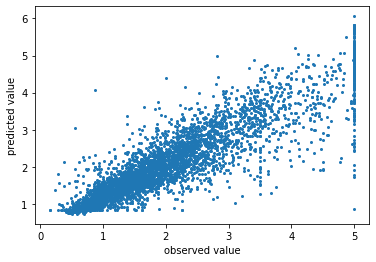

In [0]:
import matplotlib.pyplot as plt

mlflow.tensorflow.autolog()

with mlflow.start_run() as run:
  
  history = new_model.fit(X_train, y_train, epochs=35, callbacks=[early_stopping])
  
  # Save the run information to register the model later
  kerasURI = run.info.artifact_uri
  
  # Evaluate model on test dataset and log result
  mlflow.log_param("eval_result", new_model.evaluate(X_test, y_test)[0])
  
  # Plot predicted vs known values for a quick visual check of the model and log the plot as an artifact
  keras_pred = new_model.predict(X_test)
  plt.plot(y_test, keras_pred, "o", markersize=2)
  plt.xlabel("observed value")
  plt.ylabel("predicted value")
  plt.savefig("kplot.png")
  mlflow.log_artifact("kplot.png") 

## Register the model in MLflow and use the model to make predictions

* Note: if you register model with same name before you will experince error.

In [0]:
'''
import time

model_name = "cal_housing_keras"
model_uri = kerasURI+"/model"
new_model_version = mlflow.register_model(model_uri, model_name)

# Registering the model takes a few seconds, so add a delay before continuing with the next cell
time.sleep(5)
'''

Out[23]: '\nimport time\n\nmodel_name = "cal_housing_keras"\nmodel_uri = kerasURI+"/model"\nnew_model_version = mlflow.register_model(model_uri, model_name)\n\n# Registering the model takes a few seconds, so add a delay before continuing with the next cell\ntime.sleep(5)\n'

### Load the model for inference and make predictions

In [0]:
'''
keras_model = mlflow.keras.load_model(f"models:/{model_name}/{new_model_version.version}")

keras_pred = keras_model.predict(X_test)
keras_pred
'''

Out[24]: '\nkeras_model = mlflow.keras.load_model(f"models:/{model_name}/{new_model_version.version}")\n\nkeras_pred = keras_model.predict(X_test)\nkeras_pred\n'

## Clean up
To stop TensorBoard

In [0]:
dbutils.tensorboard.stop()

Looking for active tensorboard process...
Active tensorboard process killed...
Out[25]: True